# Algoritmos de optimización - Reto 2

Nombre: Julio Emanuel Suriano Bryk

Link en Github: https://github.com/EmaSuriano/python-demos/blob/main/submits/Algoritmos_R2.ipynb

Link en Google Colab: https://colab.research.google.com/github/EmaSuriano/python-demos/blob/main/submits/Algoritmos_R2.ipynb

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

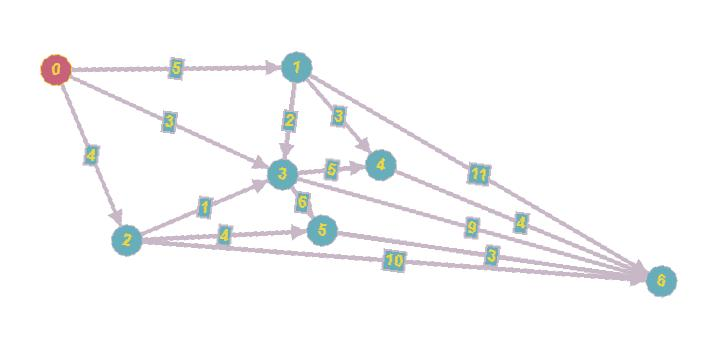

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [50]:
import math


def get_nodes(routes: list[list]) -> list:
    """Given the routes configuration, return the list of unique nodes"""
    all_nodes = [num for sublist in routes for num in sublist[:2]]
    return list(set(all_nodes))


def dijkstra(routes: list, start_node: int) -> list:
    nodes_amount = len(get_nodes(routes))

    # cost array to store
    costs = [math.inf] * nodes_amount
    visited = [False] * nodes_amount
    connections = [-1] * nodes_amount
    queue = []

    visited[start_node] = True
    costs[start_node] = 0

    queue.append((start_node, 0))

    while len(queue) > 0:
        queue.sort(key=lambda item: item[1], reverse=True)

        curr_node, curr_cost = queue.pop()
        visited[curr_node] = True

        curr_paths = [path for path in routes if path[0] == curr_node]
        for prev_node, next_node, next_cost in curr_paths:
            if visited[next_node]:
                continue

            new_cost = next_cost + curr_cost

            if new_cost < costs[next_node]:
                costs[next_node] = new_cost
                connections[next_node] = prev_node

                queue.append((next_node, new_cost))

    return (costs, connections)


ROUTES = [
    [0, 1, 5],
    [0, 3, 3],
    [0, 2, 4],
    [1, 3, 2],
    [1, 4, 3],
    [1, 6, 11],
    [2, 3, 1],
    [2, 5, 4],
    [2, 6, 10],
    [3, 4, 5],
    [3, 5, 6],
    [3, 6, 9],
    [4, 6, 4],
    [5, 6, 3],
]
start_node = 0
to_node = 6


def find_shortest_path(routes: list, start_node: int, to_node: int):
    costs, connections = dijkstra(routes, start_node)
    route = []
    cost = costs[to_node]

    # was able to reach the node
    if cost < math.inf:
        route.append(to_node)
        while route[-1] != start_node:
            next_node = connections[route[-1]]
            route.append(next_node)

        route.reverse()

    return (costs[to_node], route)


res = find_shortest_path(ROUTES, 0, 6)
print("Cost:", res[0])
print("Path:", res[1])

Cost: 11
Path: [0, 2, 5, 6]


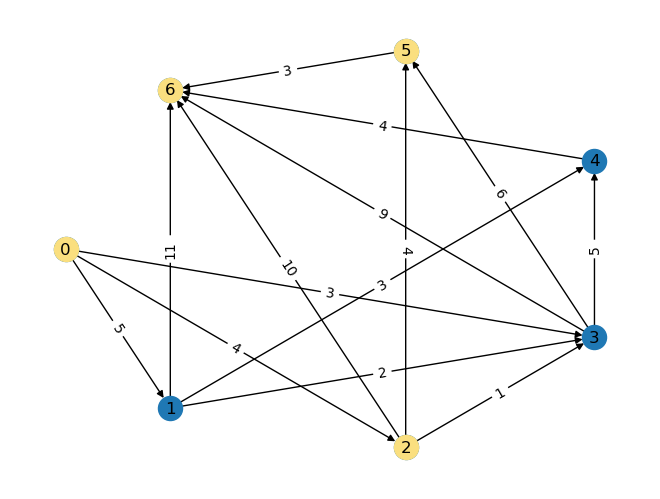

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph: list, connections: list):
    """
    Takes the whole graph to draw and the selected connections by index
    """
    # Create a graph
    G = nx.DiGraph()

    # extract list of nodes based on the connections and merge from and to into a single set
    nodes = {node[0] for node in graph} | {node[1] for node in graph}

    # Add nodes to the graph
    for node in nodes:      
      G.add_node(node)

    # Add connections to the graph
    for from_node, to_node, weight in graph:
        G.add_edge(from_node, to_node, weight=weight)

    # Calculate positions for nodes
    pos = nx.shell_layout(G)

    nx.draw(G, pos, with_labels=True)  # draw nodes, labels, and edges
    

    # Draw edge labels with weights
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    nx.draw_networkx_nodes(G, pos, nodelist=connections, node_color='#FADF7F')

    plt.show()

draw_graph(ROUTES, res[1])

## Descenso del gradiente

In [52]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [108]:
# Definimos la funcion
# Paraboloide
f = lambda X: X[0] ** 2 + X[1] ** 2  # Funcion
df = lambda X: [2 * X[0], 2 * X[1]]  # Gradiente

lr = 0.1
n = 100

def gradient_descent(f, df, initial_X, learning_rate, iterations):
    X = initial_X[:]
    history = []

    for _ in range(iterations):
        descend_vector = df(X)
        X[0] -= descend_vector[0] * learning_rate
        X[1] -= descend_vector[1] * learning_rate
        history.append((X[0], X[1], f(X)))

    return X, history


start_point = [1, 2]
res = gradient_descent(f, df, initial_X=start_point, learning_rate=lr, iterations=n)


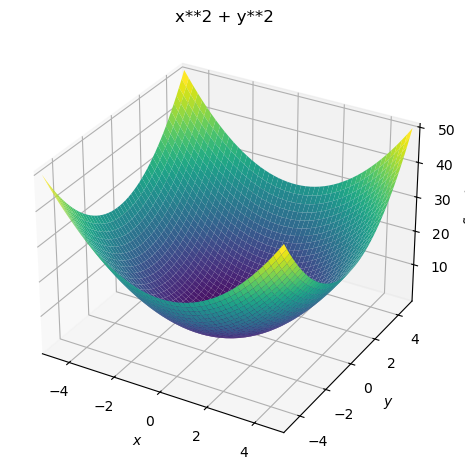

In [132]:
from sympy import symbols, cos, sin
from sympy.plotting import plot3d, plot3d_parametric_line

x, y = symbols("x y")

expr = x**2 + y**2
optimal_point, history = res

# Plot the 3D surface
p = plot3d(expr, (x, -5, 5), (y, -5, 5), title="x**2 + y**2")

# Plot gradient descent history
# history_points = [(X[0], X[1], expr.subs({x: X[0], y: X[1]})) for X in history]
# print(history_points)
# plot3d(
#     expr
# )

# alpha = [x, x, x]
# plot3d_parametric_line(*alpha, (x, -5, 5))

# Plot optimal point
# optimal_point_value = expr.subs({x: optimal_point[0], y: optimal_point[1]})
# # p.scatter([(optimal_point[0], optimal_point[1], optimal_point_value)], (0, 1), color='green', label='Optimal Point')
# plot3d_parametric_line((optimal_point[0], optimal_point[1], optimal_point_value), show=False, line_color='green', label='Optimal Point')



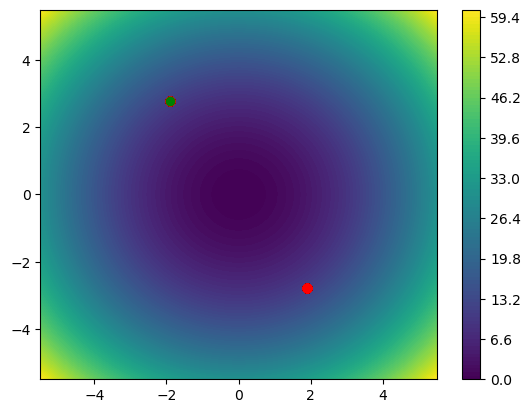

Solucion: [-1.8938524810063653, 2.7750012318011805] 11.287309056312035


In [55]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
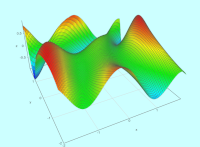


In [56]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
